In [25]:
import pandas as pd
import os
from glob import glob
from reports import get_average_classification_report
pd.options.display.float_format = '{:.4f}'.format
from functools import reduce
pd.options.display.float_format = '{:.4f}'.format
import seaborn as sns

In [2]:
target_trained_with_nums = [400, 500, 600, 700, 800, 900, 1000, 2000]
dirnames = sorted(glob(os.path.join('C:\DATA\ComBERT', 'results_spamFiltering', 'CM_epochs', '*_seed2')))
dirnames

['C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\Araci_CM_epoch3_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\Araci_CM_epoch4_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\Araci_CM_epoch6_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\Araci_CM_epoch9_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\BERT_CM_epoch3_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\BERT_CM_epoch4_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\BERT_CM_epoch6_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\BERT_CM_epoch9_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\SECBERT_CM_epoch3_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\SECBERT_CM_epoch4_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\SECBERT_CM_epoch6_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\SECBERT_CM_epoch9_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_e

In [3]:
dfs = []
for dirname in dirnames:
    model_name, method_name, epoch_num, seed_num = os.path.basename(dirname).split('_')
    
    records = []
    for target_trained_with_num in target_trained_with_nums:
        filepaths = glob(os.path.join(os.path.dirname(dirname), '{}_*'.format('_'.join([model_name, method_name, epoch_num])), \
                  'classification_report_train_{}.csv'.format(target_trained_with_num)))
        
        column_name = '_'.join([model_name, method_name, epoch_num])
        averaged_classification_report_df = get_average_classification_report([pd.read_csv(filepath) for filepath in filepaths])
        acc = 100*averaged_classification_report_df.filter(items = ['accuracy'], axis=0)['f1-score'].values[0]
        records.append((target_trained_with_num, acc))
    dfs.append(pd.DataFrame(records, columns=['trained_with', column_name]).sort_values(by=['trained_with']))

result = reduce(lambda df1,df2: pd.merge(df1,df2,on='trained_with'), dfs)
result.set_index('trained_with', inplace=True)
result.loc['Average'] = result.mean()

result

,Araci_CM_epoch3,Araci_CM_epoch4,Araci_CM_epoch6,Araci_CM_epoch9,BERT_CM_epoch3,BERT_CM_epoch4,BERT_CM_epoch6,BERT_CM_epoch9,SECBERT_CM_epoch3,SECBERT_CM_epoch4,SECBERT_CM_epoch6,SECBERT_CM_epoch9,Yang_CM_epoch3,Yang_CM_epoch4,Yang_CM_epoch6,Yang_CM_epoch9
trained_with,,,,,,,,,,,,,,,,
400,59.3600,76.9267,76.5267,77.5200,60.1033,75.7867,75.9833,78.3833,56.1100,78.9367,78.4100,76.4767,66.3567,79.8933,79.5367,78.3367
500,67.3667,78.8500,79.5067,78.7733,64.4700,77.0867,78.1733,78.3233,62.8433,80.3067,78.2267,80.3033,70.6500,80.5633,78.0833,79.8667
600,69.8733,76.9200,79.5267,80.0367,68.2367,78.1833,80.3800,79.8400,67.6500,80.5133,79.6600,79.0567,72.2333,79.0967,78.5100,79.1167
700,71.5367,78.5900,79.3700,79.5700,69.8400,78.7000,79.7200,78.1100,70.5433,80.4267,79.7700,78.9100,75.0533,79.9133,79.8767,80.0367
800,72.6033,78.5767,79.6800,80.0733,67.9633,78.9600,80.1167,78.5233,69.6900,80.6967,79.7100,79.4067,76.5500,80.1667,78.5000,79.8033
900,74.5300,79.8200,78.8967,79.2933,73.0967,79.4067,79.8733,79.2067,73.6567,80.0800,79.4067,79.9733,77.9167,79.5167,80.4933,79.8233
1000,75.9600,79.7933,79.9000,79.3633,72.8667,79.8800,80.0333,78.3300,74.0600,79.9167,79.1867,79.9933,78.3767,79.3233,79.8800,80.2300
2000,80.9300,81.7000,80.9033,81.5000,80.4200,81.3333,81.7300,81.3600,80.1467,81.7433,81.7900,81.8300,80.9967,82.3067,81.4800,81.8433
Average,71.5200,78.8971,79.2887,79.5162,69.6246,78.6671,79.5012,79.0096,69.3375,80.3275,79.5200,79.4938,74.7667,80.0975,79.5450,79.8821


Average of the four models

In [16]:
dfs = []
for epoch_num in set([item[-1] for item in result.columns]):
    colname = 'epoch{}'.format(epoch_num)
    dfs.append(pd.DataFrame(result[[item for item in result.columns if colname in item]].mean(axis=1), columns=[colname]))
average_result = reduce(lambda df1,df2: pd.merge(df1,df2,on='trained_with'), dfs)
average_result

,epoch3,epoch4,epoch6,epoch9
trained_with,,,,
400,60.4825,77.8858,77.6142,77.6792
500,66.3325,79.2017,78.4975,79.3167
600,69.4983,78.6783,79.5192,79.5125
700,71.7433,79.4075,79.6842,79.1567
800,71.7017,79.6000,79.5017,79.4517
900,74.8000,79.7058,79.6675,79.5742
1000,75.3158,79.7283,79.7500,79.4792
2000,80.6233,81.7708,81.4758,81.6333
Average,71.3122,79.4973,79.4638,79.4754


<AxesSubplot:>

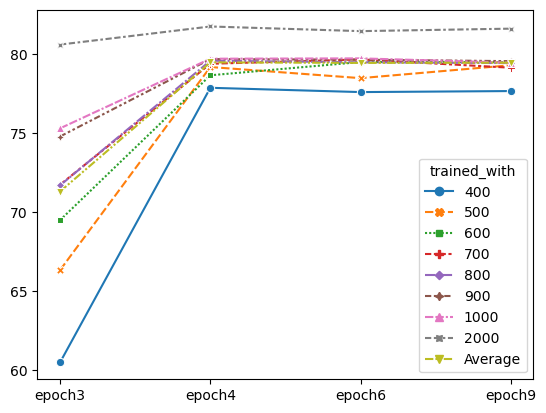

In [24]:
sns.lineplot(data=average_result.transpose(), markers=True)